<a href="https://colab.research.google.com/github/khalida-mujahid/ML-practice/blob/master/batch9_lecture11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!nvidia-smi

Fri Mar  1 14:13:54 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.79       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 1us/step


In [0]:
print(x_train.shape)
print(y_train.shape)

(404, 13)
(404,)


In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()
model.add(Dense(2, activation = 'relu', use_bias= False, ))
model.add(Dense(1, use_bias= False))

In [0]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [0]:
from keras.callbacks import EarlyStopping

In [0]:
es = EarlyStopping(monitor = 'val_loss', patience = 10)

In [0]:
model.fit(x = x_train, y = y_train, batch_size = 32, epochs = 10000, 
         validation_split = 0.2, callbacks = [es])

In [0]:
model.evaluate(x = x_test, y = y_test, batch_size = 32)

102/102 [==============================] - 0s 112us/step


615.8578574984681

In [0]:
model.summary()

In [0]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [0]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [0]:
print(y_train[:4])

[9 0 0 3]


In [0]:
import matplotlib.pyplot as plt
import numpy as np

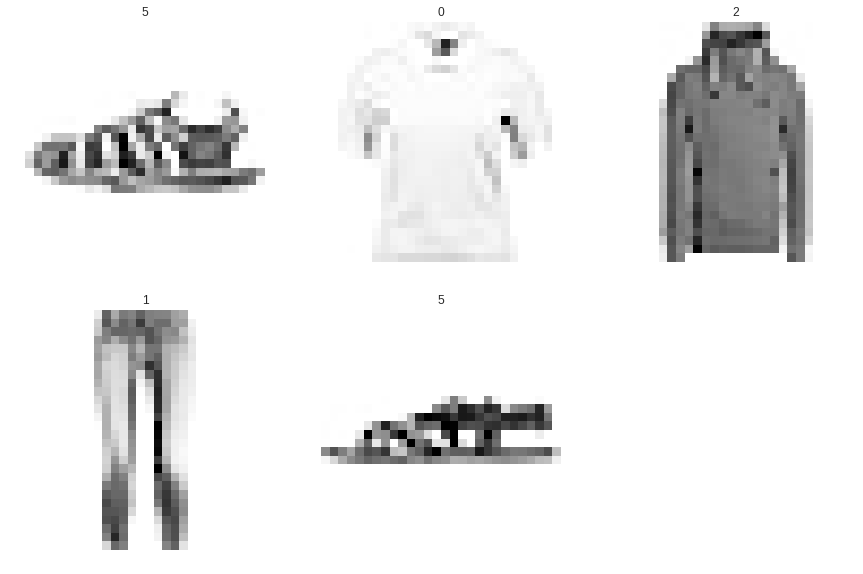

In [0]:
plt.figure(figsize = (15,15))
for i in range(5):
  idx = np.random.randint(0, 60000)
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[idx])
  plt.axis('off')
  plt.title(y_train[idx])
plt.show()

In [0]:
x_train = x_train.reshape(-1, 28*28)
print(x_train.shape)

(60000, 784)


In [0]:
x_test = x_test.reshape(-1, 28*28)
print(x_test.shape)

(10000, 784)


In [0]:
y_train = to_categorical(y_train, 10)

In [0]:
from keras.models import Model
from keras.layers import Input, Activation, Average

In [0]:
inp = Input(shape = (784, ))

x1 = Dense(256, activation = 'tanh')(inp)
x2 = Dense(128, activation = 'tanh')(inp)
x3 = Dense(512, activation = 'tanh')(inp)

x1 = Dense(10, activation = 'sigmoid')(x1)
x2 = Dense(10, activation = 'sigmoid')(x2)
x3 = Dense(10, activation = 'sigmoid')(x3)

x = Average()([x1,x2,x3])
out = Dense(10, activation = 'softmax')(x)

In [0]:
model = Model(inp, out)

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 784)          0                                            
__________________________________________________________________________________________________
dense_56 (Dense)                (None, 256)          200960      input_11[0][0]                   
__________________________________________________________________________________________________
dense_57 (Dense)                (None, 128)          100480      input_11[0][0]                   
__________________________________________________________________________________________________
dense_58 (Dense)                (None, 512)          401920      input_11[0][0]                   
__________________________________________________________________________________________________
dense_59 (

In [0]:
from keras.utils import to_categorical

In [0]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [0]:
model.fit(x_train, y_train, epochs = 1000, validation_split = 0.2, 
          callbacks = [es])

Train on 48000 samples, validate on 12000 samples
Epoch 1/1000
48000/48000 [==============================] - 13s 269us/step - loss: 1.2790 - acc: 0.6446 - val_loss: 0.9221 - val_acc: 0.7112
Epoch 2/1000
48000/48000 [==============================] - 12s 253us/step - loss: 0.8471 - acc: 0.7060 - val_loss: 0.7784 - val_acc: 0.7222
Epoch 3/1000
48000/48000 [==============================] - 12s 253us/step - loss: 0.7662 - acc: 0.7159 - val_loss: 0.7284 - val_acc: 0.7242
Epoch 4/1000
48000/48000 [==============================] - 12s 259us/step - loss: 0.7316 - acc: 0.7205 - val_loss: 0.6985 - val_acc: 0.7290
Epoch 5/1000
48000/48000 [==============================] - 12s 257us/step - loss: 0.7234 - acc: 0.7209 - val_loss: 0.7069 - val_acc: 0.7163
Epoch 6/1000
48000/48000 [==============================] - 12s 249us/step - loss: 0.7192 - acc: 0.7154 - val_loss: 0.7151 - val_acc: 0.7148
Epoch 7/1000
48000/48000 [==============================] - 12s 247us/step - loss: 0.7001 - acc: 0.7282 